# AIM :- Text Classification using naive Bayesian approach.

# Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

# Visualization of dataset

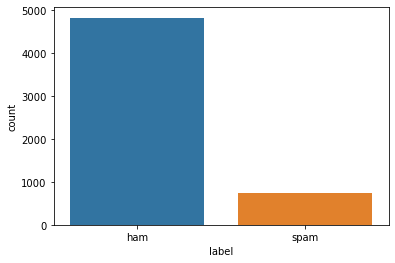

In [ ]:
sns.countplot(data=df, x='label')

# Pre-processing

In [ ]:
def toLower(sentence):
    return sentence.lower()

def tokenizer(sentence):
    tokens = list(set(nltk.word_tokenize(sentence)))
    return tokens

def stopwords_removal(tokens):
    stop_words = nltk.corpus.stopwords.words('english')
    stop_words.extend([',','?','""',"''",'.','!', "'",'"',"'d","'ll",'[',']','--',':',';','///','@', '``',
                       '#', '$', '%', '&', "'re", "'s", '(', ')', '*', '**', '**the', '-', '/', '//',
                       '§', '§§','...','–', '—', '‘', '’', '“', '”', '•', '─',"'m", "'ve", '***'])
    filtered_tokens = [i for i in tokens if not i in stop_words]
    return filtered_tokens

def stemming(tokens):
    stemmer = nltk.stem.porter.PorterStemmer()
    stemmed_tokens = [stemmer.stem(i) for i in tokens]
    return stemmed_tokens

def pre_process(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    tokens = stopwords_removal(tokens)
    stems = stemming(tokens)
    return stems

In [ ]:
df['message'][:15].apply(pre_process)

0     [Go, jurong, point, crazy.., avail, bugi, n, g...
1                          [Ok, lar, joke, wif, u, oni]
2     [free, entri, 2, wkli, comp, win, FA, cup, fin...
3         [U, dun, say, earli, hor, U, c, alreadi, say]
4     [nah, I, n't, think, goe, usf, live, around, t...
5     [freemsg, hey, darl, 3, week, word, back, I, l...
6     [even, brother, like, speak, they, treat, like...
7     [As, per, request, 'mell, mell, oru, minnaminu...
8     [winner, As, valu, network, custom, select, re...
9     [had, mobil, 11, month, U, R, entitl, updat, l...
10    [I, gon, na, home, soon, n't, want, talk, stuf...
11    [six, chanc, win, cash, from, 100, 20,000, pou...
12    [urgent, you, 1, week, free, membership, å£100...
13    [I, search, right, word, thank, breather, I, p...
14           [I, have, A, date, ON, sunday, with, will]
Name: message, dtype: object

# Creating Tf-idf Vectorizer

In [ ]:
tfidfv = TfidfVectorizer(analyzer=pre_process)
data = tfidfv.fit_transform(df['message'])

In [ ]:
mess = df.iloc[2]['message']
print(mess)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [ ]:
print(tfidfv.transform([mess]))

  (0, 8269)	0.1862767344382167
  (0, 8234)	0.1425814600440779
  (0, 7793)	0.12074489968523497
  (0, 7615)	0.21585993786649796
  (0, 7472)	0.11573060515474674
  (0, 7165)	0.19719501461763816
  (0, 6376)	0.15855135671728685
  (0, 6330)	0.1642414440835781
  (0, 6282)	0.16270229419265972
  (0, 5100)	0.1549556511232214
  (0, 3616)	0.1133549213294916
  (0, 3486)	0.1642414440835781
  (0, 3262)	0.3519271973030762
  (0, 2750)	0.2000321406903793
  (0, 2571)	0.192285497620941
  (0, 1677)	0.1642414440835781
  (0, 1245)	0.1455765208347183
  (0, 1138)	0.4592306882373211
  (0, 1109)	0.14763307653786537
  (0, 1021)	0.21585993786649796
  (0, 614)	0.22186870104922227
  (0, 602)	0.22186870104922227
  (0, 583)	0.09813226854611577
  (0, 230)	0.22961534411866055


# Creating pipeline for model (Vetorizer+MultinomialNB)

In [ ]:
spam_filter = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=pre_process)), # messages to weighted TFIDF score
    ('classifier', MultinomialNB())                    # train on TFIDF vectors with Naive Bayes
])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.25, random_state = 21)

In [ ]:
spam_filter.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer=<function pre_process at 0x0000021120B00EE8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=F

In [ ]:
predictions = spam_filter.predict(x_test)

In [ ]:
count = 0
for i in range(len(y_test)):
    if y_test.iloc[i] != predictions[i]:
        count += 1
print('Total number of test cases', len(y_test))
print('Number of wrong of predictions', count)

Total number of test cases 1393
Number of wrong of predictions 51


# Result Evaluation

In [ ]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1261
        spam       0.72      0.99      0.84       132

    accuracy                           0.96      1393
   macro avg       0.86      0.98      0.91      1393
weighted avg       0.97      0.96      0.97      1393



# For custom input

In [ ]:
def detect_spam(s):
    return spam_filter.predict([s])[0]

In [ ]:
x = input('Enter message for classification in spam/non-spam\n')
detect_spam(x)

Enter message for classification in spam/non-spam
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


'spam'

# Learning Outcomes

    1. I got to learn how naive bayes works with text data and it relation with previous input.
    2. I got to learn how to create pipeline for model which directly do all the necessary things.
    3. I got to leran different types of metrics like macro avg. and weighted avg.